# <a id="content" style="color:#023e8a;">Introduction</a> 

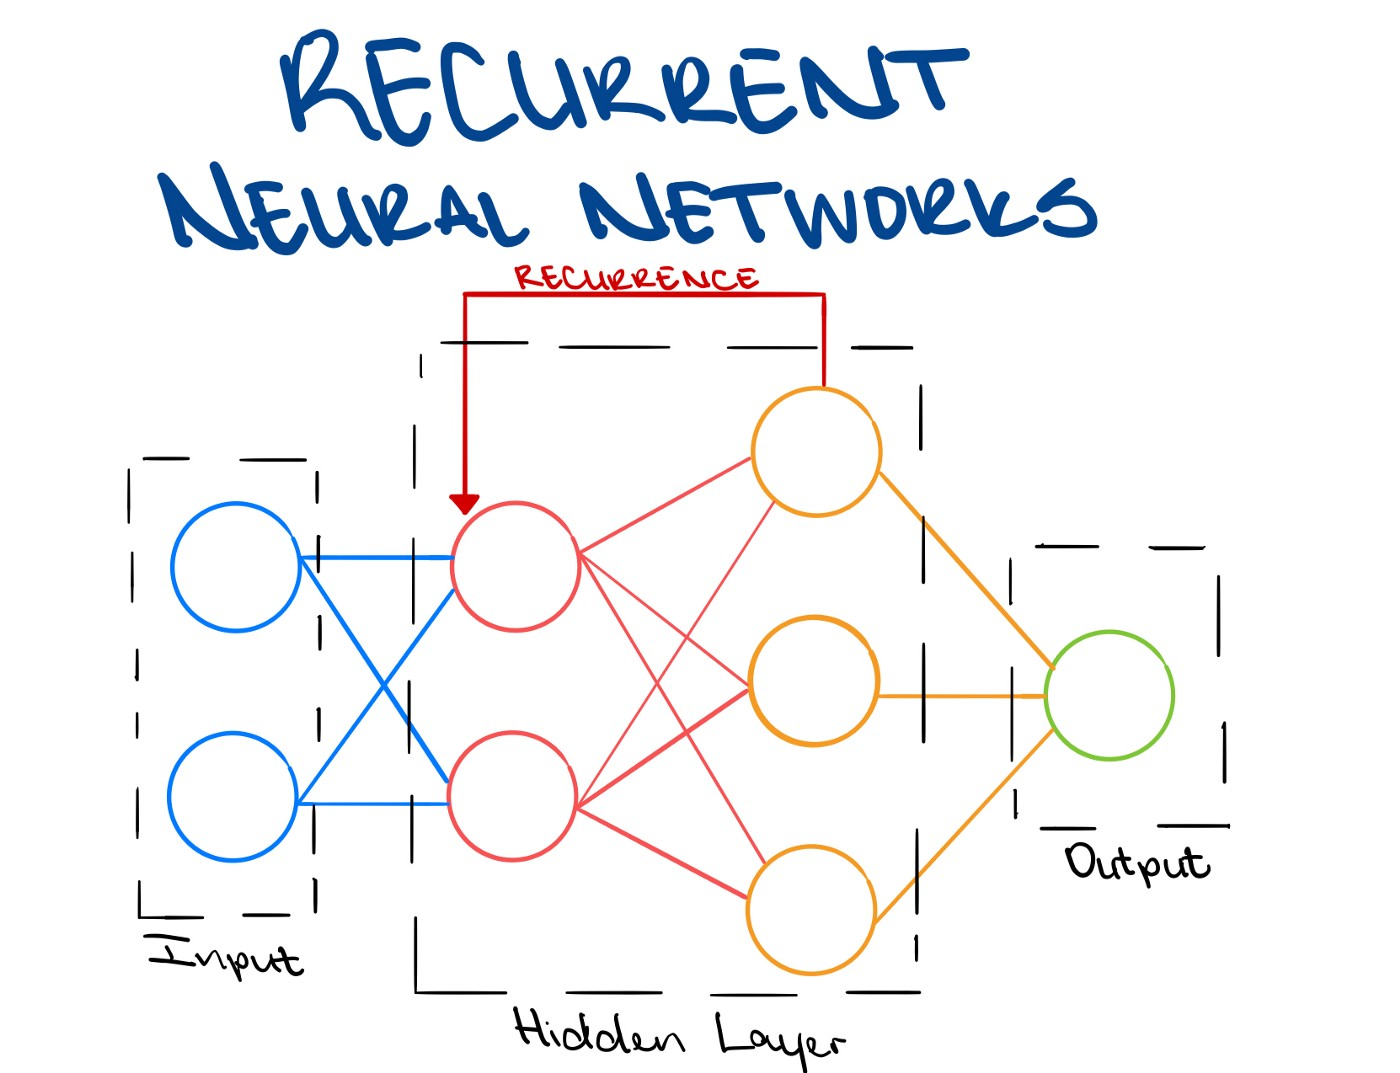

**<a id="11" style="color:#023e8a;">Why RNN?</a>**

While training `CNN`,
* For each iteration, it doesn’t remember what it saw in the previous iteration when we are processing the current set of data
* It's a big trouble when identifying correlations and patterns of temporal information which comes in sequence
* That's why `Recurrent Neural Networks (RNN)` comes handy


**<a id="12" style="color:#023e8a;">Features of RNN</a>**

* Due to architecture, RNN is able to model memory units (hidden state),short term dependencies
* Extensively used in time-series forecasting


**<a id="13" style="color:#023e8a;">Architecture of RNN</a>**

* `Input Layer(x)`
* `Hidden Layer(s)` : Information of made `assumptions` are stored in a unit known as `memory`
* `Output Layer(o)`, at time t

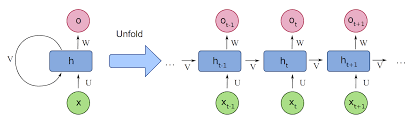

<h1><center><font size="6", style="color:#023e8a;">📊 Time Series Prediction 📊</font></center></h1>

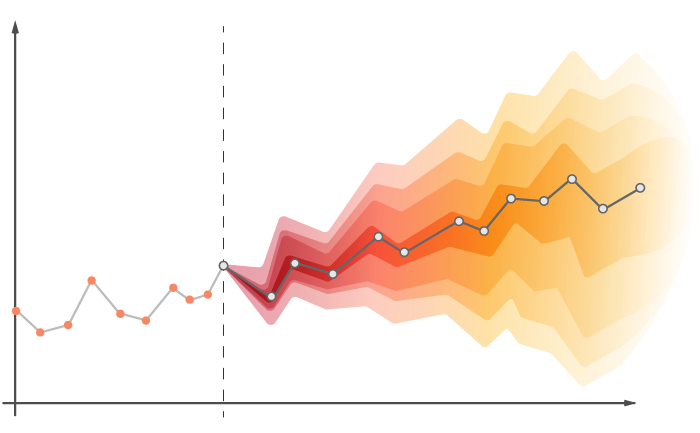


# <a id="0" style="color:#023e8a;">Table of Content</a>
   
- <a href='#1' style="color:#023e8a;">Import Libraries</a>  
- <a href='#2' style="color:#023e8a;">Dataset</a>  
- <a href='#3' style="color:#023e8a;">Building Recurrent Neural Network</a>
    - <a href='#31' style="color:#023e8a;">forward Method</a>
    - <a href='#32' style="color:#023e8a;">RNN Module</a>
    - <a href='#33' style="color:#023e8a;">view Method</a>
- <a href='#4' style="color:#023e8a;">Parameters</a>
- <a href='#5' style="color:#023e8a;">Loss Function and Optimizer</a>
    - <a href='#51' style="color:#023e8a;">Mean Squared Error</a>
    - <a href='#52' style="color:#023e8a;">Adam Optimizer</a>
- <a href='#6' style="color:#023e8a;">Training the model</a>
    - <a href='#61' style="color:#023e8a;">unsqueze() Method</a>
    - <a href='#62' style="color:#023e8a;">zero_grad() Method</a>
    - <a href='#63' style="color:#023e8a;">step() Method</a>
    - <a href='#64' style="color:#023e8a;">backward() Method</a>
    - <a href='#64' style="color:#023e8a;">flatten() Method</a>
- <a href='#7' style="color:#023e8a;">Visualizing final results</a>
- <a href='#8' style="color:#023e8a;">Conclusions</a>


# <a id="1" style="color:#023e8a;"> Import Libraries</a> 

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# <a id="2" style="color:#023e8a;"> Dataset</a> 

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

* Instead of importing data, we will create our data to build a `time series prediction` model with `RNNs`
* Creating a series of time steps consisting of `100` points, each at `equal intervals` within the range of `0 to pi` and their corresponding `cosine` values 
* Input variable, `x` consists of the first 100 cosine values of our time steps 
* Output variable, `y` consists of values starting from the second point i.e. y precedes x by one time step

**<a id="21" style="color:#023e8a;"> np.linspace()</a>**

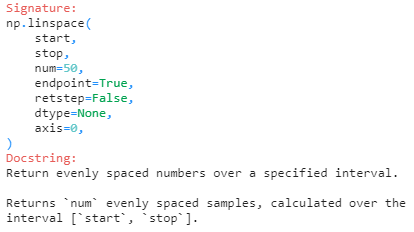

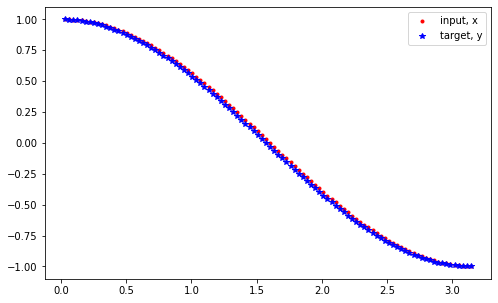

In [2]:
plt.figure(figsize=(8,5))

seq_length = 100

time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.cos(time_steps)
data.resize((seq_length+1, 1))

# all excluding last piece of data
x = data[:-1] 
# starting from second data to all
y = data[1:]

plt.plot(time_steps[1:], x, 'r.', label='input, x')
plt.plot(time_steps[1:], y, 'b*', label='target, y')

plt.legend(loc='best')
plt.show()


# <a id="3" style="color:#023e8a;"> Building Recurrent Neural Network</a> 

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)


 **<a id="31" style="color:#023e8a;"> Shape of Parameters in `forward()`</a>**
* `x` (batch_size, seq_length, input_size)
* `hidden` (n_layers, batch_size, hidden_dim)
* `r_out` (batch_size, time_step, hidden_size)



**<a id="32" style="color:#023e8a;">torch.nn.RNN()</a>**

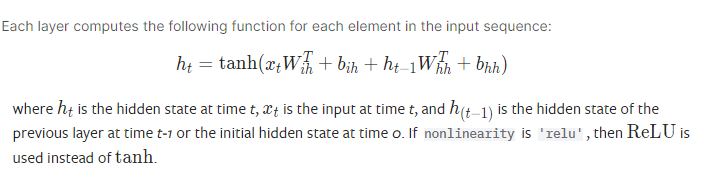


**<a id="33" style="color:#023e8a;">torch.Tensor.view()</a>**

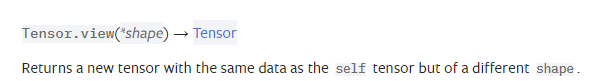

In [3]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim = hidden_dim
        
        #batch_first = True indicates, the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        
        r_out, hidden = self.rnn(x, hidden)
        #To reshape output to (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)
        
        output = self.fc(r_out)
        
        return output, hidden


# <a id="4" style="color:#023e8a;"> Parameters</a> 

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

* Passing data to the input layer : `1 node`, further connected to the hidden state : `32 nodes` and eventually leading to the final output layer :` 1 node`
* `2 hidden layers` are taken
* Creating object of the RNN class, named as `rnn`

In [4]:
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 2

rnn = RNN(input_size, output_size, hidden_dim, n_layers)
rnn

RNN(
  (rnn): RNN(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


# <a id="5" style="color:#023e8a;"> Loss Function and Optimizer</a> 

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

* Since it's a `regression model`, `mean-squared error`(MSE) is used to calculate loss
* `Adam optimizer` is typically used for `recurrent models`


**<a id="51" style="color:#023e8a;">Mean Squared Error</a>**

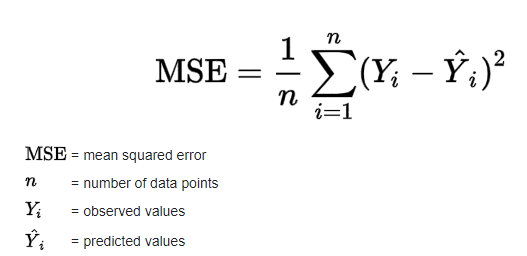


**<a id="52" style="color:#023e8a;">torch.optim.Adam()</a>**

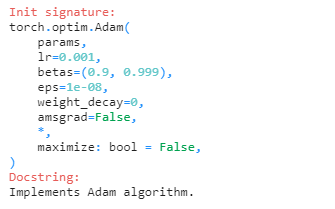

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.001)


# <a id="6" style="color:#023e8a;">Training the model</a> 

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

Defining a function `train()` which takes 
* the model
* number of steps for which it trains the model 
* print_every which will show the results after those many steps


**<a id="61" style="color:#023e8a;">torch.unsqueeze()</a>**
* Returns a new tensor with a dimension of size one inserted at the specified position.
* The returned tensor shares the same underlying data with this tensor.

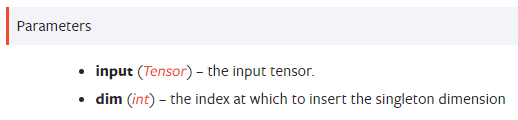


**<a id="62" style="color:#023e8a;">torch.optim.optimizer.zero_grad()</a>**

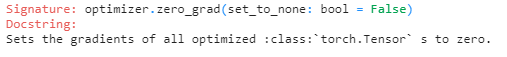


**<a id="63" style="color:#023e8a;">torch.optim.optimizer.step()</a>**

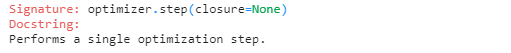


**<a id="64" style="color:#023e8a;">torch.tensor.backward()</a>**

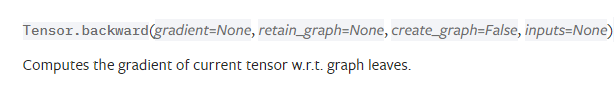


**<a id="65" style="color:#023e8a;">numpy.ndarray.flatten()</a>**

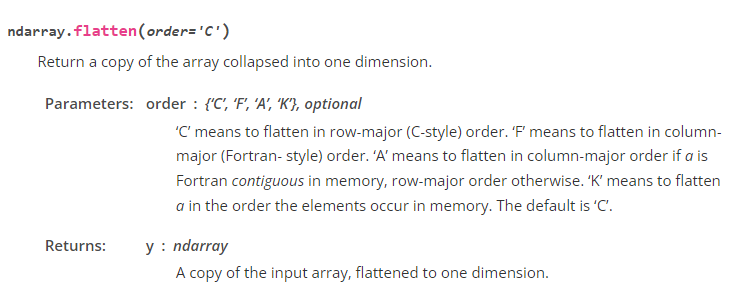

In [6]:
def train(rnn, n_steps, print_every):
    
    # initializing hidden state
    hidden = None
    
    for batch_i, step in enumerate(range(n_steps)):
        # defining train data
        time_steps = np.linspace(step * np.pi, (step + 1) * np.pi, seq_length + 1)
        data = np.cos(time_steps)
        data.resize((seq_length + 1, 1))
        
        x = data[:-1]
        y = data[1:]
        
        # unsqueezing gives a 1, batch_size dimension
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)
        
         # outputs from rnn
        prediction, hidden = rnn(x_tensor, hidden)
        
        '''Representing memory by
        1. Creating a new variable for hidden
        2. Detaching hidden state from history
        This way, we don't have to backpropagate through the entire history
        '''
        
        hidden = hidden.data
        
        # Calculating Loss
        loss = criterion(prediction, y_tensor)
        
        # Clearing gradient_buffer
        optimizer.zero_grad()
        
        # Performing backprop
        loss.backward()
        
        # Updating weights
        optimizer.step()
        
        # Displaying loss and predictions
        if batch_i % print_every == 0:
            print("Loss:", loss.item())
            # Input
            plt.plot(time_steps[1:], x, 'r.')
            # Predictions
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b*')
            plt.show()
    return rnn


# <a id="7" style="color:#023e8a;">Visualizing final results</a> 

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

* At initial stages our model does not make accurate predictions 
* But after training the model for 75 steps we are able to fetch pretty good results

Loss: 0.5571848154067993


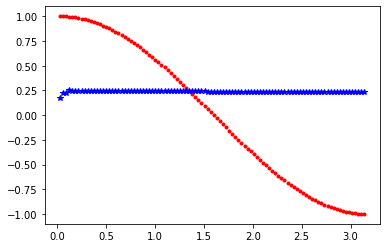

Loss: 0.23793865740299225


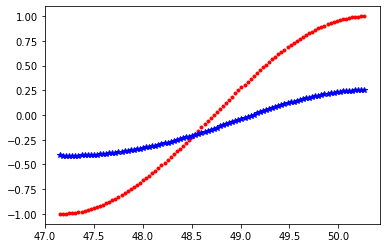

Loss: 0.04037732258439064


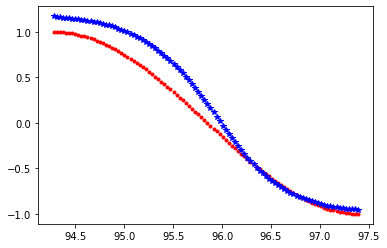

Loss: 0.017463451251387596


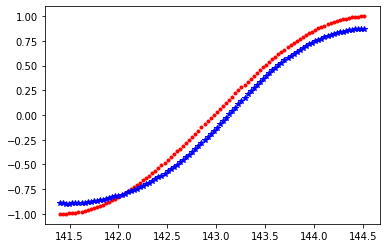

Loss: 0.006440264638513327


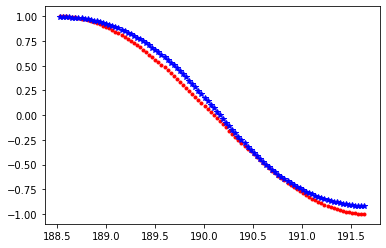

Loss: 0.0044843899086117744


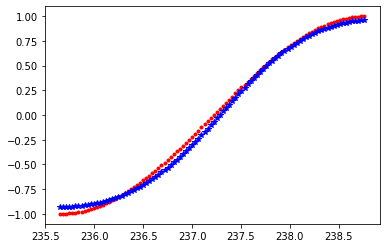

Loss: 0.0031705123838037252


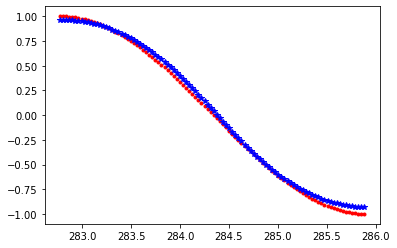

Loss: 0.002814206527546048


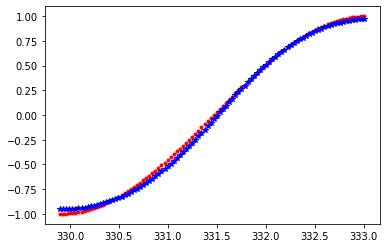

Loss: 0.0021071091759949923


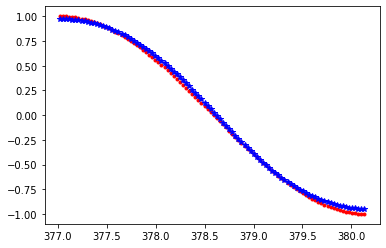

Loss: 0.0019250273471698165


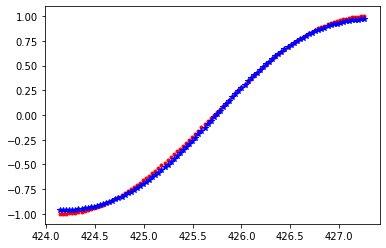

In [7]:
n_steps = 150
print_every = 15

trained_rnn = train(rnn, n_steps, print_every)


# <a id="8" style="color:#023e8a;">Conclusions</a> 

[**<span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 2px">Back to Table of Content</span>**](#0)

* Very first time series prediction is done with a Simple Rnn. 
* Time-series prediction can be applied to many tasks - weather forecasting or predicting the ebb and flow of stock market prices. 
* Predictions can also be generated much further in the future than just one-time step!

## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">Thanks for reading! If you have any feedback or suggestion, I am pleased to hear it:)</span></center>**

